In [152]:
import pandas as pd

df_starbucks_storecount = pd.read_excel('FY23-Q3-Store-Counts-by-Market.xlsx', sheet_name='Number of Stores by Country')
df_starbucks_supple = pd.read_excel('FY23-Q3-Store-Counts-by-Market.xlsx', sheet_name='Supplemental Data')

In [153]:
df_starbucks_storecount.head()

,Country,FY23 Q3,FY23 Q2,FY23 Q1,FY22 Q4,FY22 Q3,FY22 Q2,FY22 Q1,FY21 Q4,FY21 Q3,FY21 Q2,FY21 Q1,FY20 Q4,Type
0,Canada,476.0,473.0,473.0,471.0,464.0,457.0,469.0,468.0,441.0,450.0,450.0,444.0,Licensed
1,United States of America,6664.0,6662.0,6652.0,6608.0,6536.0,6515.0,6519.0,6497.0,6451.0,6431.0,6411.0,6387.0,Licensed
2,Andorra,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Licensed
3,Argentina,132.0,131.0,131.0,133.0,133.0,133.0,133.0,133.0,133.0,134.0,134.0,135.0,Licensed
4,Aruba,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,Licensed


In [154]:
df_starbucks_supple.head()

,Quarter,Card as % of Transactions,Total Dollars Loaded ($M),# of 90-Day Active Members (M),Starbucks Rewards Member Spend % of Tender - Dollars,Mobile Order Transactions as % of Total Transactions
0,FY23 Q3,0.44,2884.0,31.4,0.57,0.28
1,FY23 Q2,0.46,2565.0,30.8,0.57,0.28
2,FY23 Q1,0.44,3299.0,30.4,0.56,0.27
3,FY22 Q4,0.43,2514.0,28.7,0.55,0.26
4,FY22 Q3,0.45,2596.0,27.4,0.53,0.25


# Analysis

the data looks a bit empty, so i tried to add new feature to dataset. First adding new continent and region

In [155]:
df_country_list = pd.read_excel('Country Region Continent.xlsx', sheet_name='list_of_country')


In [156]:
df_country_list.head()

,Country or Area,Region,Continent
0,Afghanistan,Southern Asia,Asia
1,Åland Islands,Northern Europe,Europe
2,Albania,Southern Europe,Europe
3,Algeria,Northern Africa,Africa
4,American Samoa,Polynesia,Oceania


In [157]:
new_data_store = pd.merge(df_starbucks_storecount,df_country_list, left_on='Country', right_on='Country or Area').drop('Country or Area', axis=1)

In [163]:
new_data_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    92 non-null     object 
 1   FY20 Q4    92 non-null     float64
 2   FY21 Q1    92 non-null     float64
 3   FY21 Q2    92 non-null     float64
 4   FY21 Q3    92 non-null     float64
 5   FY21 Q4    92 non-null     float64
 6   FY22 Q1    92 non-null     float64
 7   FY22 Q2    92 non-null     float64
 8   FY22 Q3    92 non-null     float64
 9   FY22 Q4    92 non-null     float64
 10  FY23 Q1    92 non-null     float64
 11  FY23 Q2    92 non-null     float64
 12  FY23 Q3    92 non-null     float64
 13  Type       92 non-null     object 
 14  Region     92 non-null     object 
 15  Continent  92 non-null     object 
dtypes: float64(12), object(4)
memory usage: 12.2+ KB


In [164]:
new_data_store.columns

Index(['Country', 'FY20 Q4', 'FY21 Q1', 'FY21 Q2', 'FY21 Q3', 'FY21 Q4',
       'FY22 Q1', 'FY22 Q2', 'FY22 Q3', 'FY22 Q4', 'FY23 Q1 ', 'FY23 Q2',
       'FY23 Q3', 'Type', 'Region', 'Continent'],
      dtype='object')

the columns FY23 Q1 has extra space in the end. let's rename it

In [165]:
new_data_store.rename(columns = {'FY23 Q1 ':'FY23 Q1'}, inplace = True)

the dataframe looks a bit off, i need to flip the data from oldest to newest

In [166]:
new_cols = ["Country", 
            'FY20 Q4',
            'FY21 Q1',
            'FY21 Q2',
            'FY21 Q3',
            'FY21 Q4',
            'FY22 Q1',
            'FY22 Q2',
            'FY22 Q3',
            'FY22 Q4',
            'FY23 Q1',
            'FY23 Q2',
            'FY23 Q3',
            "Type",
            "Region",
            "Continent"]
new_data_store=new_data_store[new_cols]


In [167]:
new_data_store

,Country,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3,Type,Region,Continent
0,Canada,444.0,450.0,450.0,441.0,468.0,469.0,457.0,464.0,471.0,473.0,473.0,476.0,Licensed,Northern America,North America
1,Canada,1159.0,1100.0,963.0,963.0,908.0,919.0,925.0,936.0,946.0,956.0,965.0,972.0,Co-operated,Northern America,North America
2,United States of America,6387.0,6411.0,6431.0,6451.0,6497.0,6519.0,6515.0,6536.0,6608.0,6652.0,6662.0,6664.0,Licensed,Northern America,North America
3,United States of America,8950.0,8929.0,8857.0,8897.0,8953.0,8981.0,9029.0,9114.0,9270.0,9300.0,9382.0,9480.0,Co-operated,Northern America,North America
4,Andorra,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Licensed,Southern Europe,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,United Arab Emirates,212.0,216.0,220.0,225.0,233.0,243.0,251.0,265.0,273.0,280.0,284.0,286.0,Licensed,Western Asia,Asia
88,United Kingdom,737.0,748.0,762.0,771.0,791.0,811.0,827.0,842.0,838.0,860.0,878.0,894.0,Licensed,Northern Europe,Europe
89,Uruguay,9.0,9.0,9.0,9.0,9.0,10.0,11.0,11.0,12.0,12.0,13.0,14.0,Licensed,South America,South America
90,Vietnam,65.0,67.0,67.0,72.0,73.0,76.0,79.0,79.0,82.0,87.0,89.0,92.0,Licensed,South-eastern Asia,Asia


In [168]:
new_data_store.columns

Index(['Country', 'FY20 Q4', 'FY21 Q1', 'FY21 Q2', 'FY21 Q3', 'FY21 Q4',
       'FY22 Q1', 'FY22 Q2', 'FY22 Q3', 'FY22 Q4', 'FY23 Q1', 'FY23 Q2',
       'FY23 Q3', 'Type', 'Region', 'Continent'],
      dtype='object')

In [169]:
#unpivot table
# df_starbucks_storecount_melt = pd.melt(df_starbucks_storecount, id_vars=['Country', 'Continent', 'Region', 'Type'],\
#                                        value_vars=['FY23 Q3', 'FY23 Q2', 'FY23 Q1', 'FY22 Q4', 'FY22 Q3', 'FY22 Q2', 'FY22 Q1', 'FY21 Q4', 'FY21 Q3', 'FY21 Q2', 'FY21 Q1', 'FY20 Q4'],\
#                                       var_name = 'Quarter', value_name = 'Store Count')

# df_starbucks_storecount_melt.head()

new_data_store_melt = pd.melt(new_data_store, id_vars=['Country', 'Continent', 'Region', 'Type'],\
                                       value_vars=['FY20 Q4', 'FY21 Q1', 'FY21 Q2', 'FY21 Q3', 'FY21 Q4', 'FY22 Q1', 'FY22 Q2', 'FY22 Q3', 'FY22 Q4', 'FY23 Q1', 'FY23 Q2', 'FY23 Q3'],\
                                      var_name = 'Quarter', value_name = 'Store Count')

new_data_store_melt.head()

,Country,Continent,Region,Type,Quarter,Store Count
0,Canada,North America,Northern America,Licensed,FY20 Q4,444.0
1,Canada,North America,Northern America,Co-operated,FY20 Q4,1159.0
2,United States of America,North America,Northern America,Licensed,FY20 Q4,6387.0
3,United States of America,North America,Northern America,Co-operated,FY20 Q4,8950.0
4,Andorra,Europe,Southern Europe,Licensed,FY20 Q4,2.0


let's example of year 2023 quater 2

In [171]:
new_data_store_continent = new_data_store_melt[new_data_store_melt['Quarter'] == 'FY23 Q2'][['Continent', 'Store Count']].groupby('Continent').sum()
new_data_store_continent = new_data_store_continent.sort_values('Store Count', ascending = False).reset_index()
new_data_store_continent.head()

,Continent,Store Count
0,North America,18429.0
1,Asia,14844.0
2,Europe,2108.0
3,South America,666.0
4,Africa,160.0


In [173]:
new_data_store_regions = new_data_store_melt[new_data_store_melt['Quarter'] == 'FY23 Q2'][['Continent', 'Region', 'Store Count']].groupby(['Continent', 'Region']).sum()
new_data_store_regions = new_data_store_regions.reset_index()
new_data_store_regions.head()

,Continent,Region,Store Count
0,Africa,Northern Africa,95.0
1,Africa,Southern Africa,65.0
2,Asia,Central Asia,35.0
3,Asia,Eastern Asia,10614.0
4,Asia,South-eastern Asia,2108.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Oceania')])

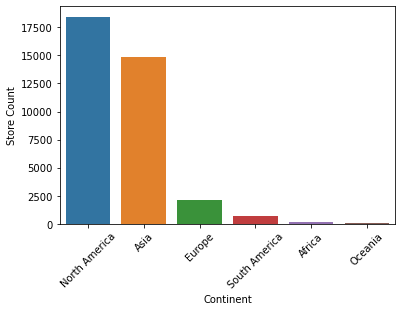

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=new_data_store_continent, x='Continent', y='Store Count')
plt.xticks(rotation = 45)

([<matplotlib.patches.Wedge at 0x7f81c0b3b370>,
 [Text(-0.04089521823136568, 1.6995080409123724, 'North America'),
  Text(-0.40091123721737, -1.6520502958060441, 'Asia'),
  Text(1.6016400607389245, -0.5698676301003722, 'Europe'),
  Text(1.6912037815951937, -0.17271296742895875, 'South America'),
  Text(2.6487845057833304, -0.08025361002571746, 'Africa'),
  Text(3.1498935495739078, -0.025896454442401524, 'Oceania')],
 [Text(-0.022853210188116112, 0.9497250816863254, '50.8%'),
  Text(-0.22403863256264792, -0.9232045770680833, '40.9%'),
  Text(0.8950341515893989, -0.31845544035020795, '5.8%'),
  Text(0.9450844661855493, -0.09651607003382988, '1.8%'),
  Text(1.899128513580501, -0.05754032416938233, '0.4%'),
  Text(2.399918894913453, -0.019730631956115446, '0.3%')])

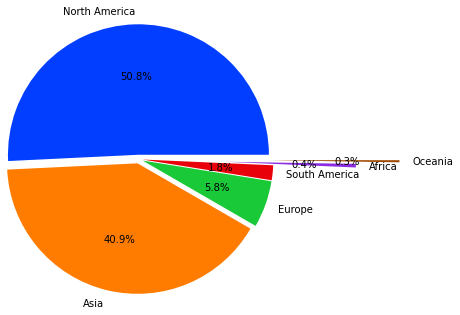

In [177]:
explode = [0.05, 0.05, 0.05, 0.05, 1, 1.5]
palette_color = sns.color_palette('bright')

plt.pie(new_data_store_continent['Store Count'], labels=new_data_store_continent['Continent'], colors=palette_color, radius = 1.5, explode=explode, autopct='%.1f%%')

Africa
            Region  Store Count
0  Northern Africa         95.0
1  Southern Africa         65.0


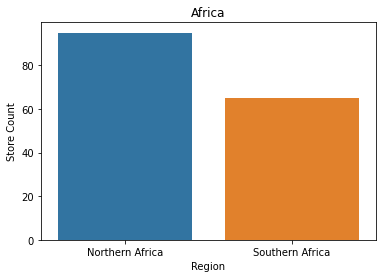

Asia
               Region  Store Count
3        Eastern Asia      10614.0
4  South-eastern Asia       2108.0
6        Western Asia       1752.0
5       Southern Asia        335.0
2        Central Asia         35.0


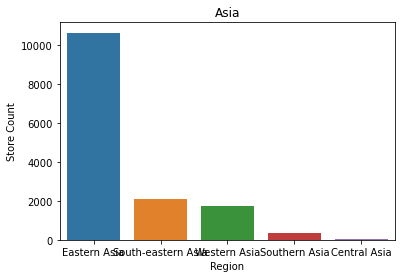

Europe
             Region  Store Count
8   Northern Europe       1013.0
10   Western Europe        594.0
9   Southern Europe        259.0
7    Eastern Europe        242.0


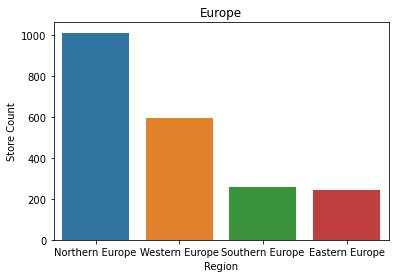

North America
              Region  Store Count
13  Northern America      17482.0
12   Central America        856.0
11         Caribbean         91.0


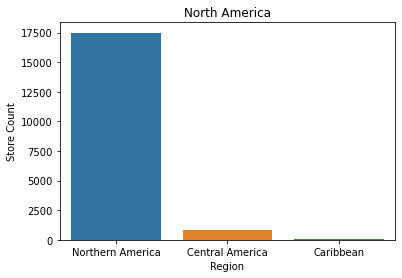

Oceania
                       Region  Store Count
14  Australia and New Zealand         95.0


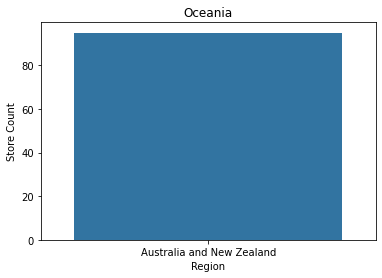

South America
           Region  Store Count
15  South America        666.0


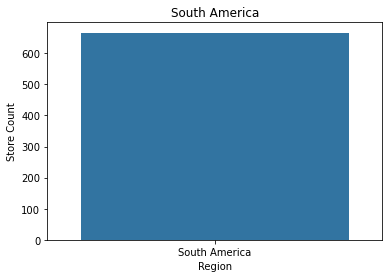

In [178]:
arr_continent = new_data_store_regions['Continent'].unique()

for continent in arr_continent:
    print(continent)
    df_region = new_data_store_regions[new_data_store_regions['Continent'] == continent][['Region', 'Store Count']].sort_values('Store Count', ascending=False)
    print(df_region)
    sns.barplot(data=df_region, x='Region', y='Store Count')
    plt.title(continent)
    plt.show()

In [179]:
new_data_store_melt_growth = new_data_store_melt[['Continent', 'Quarter', 'Store Count']].groupby(['Continent', 'Quarter']).sum()
new_data_store_melt_growth = new_data_store_melt_growth.sort_values(['Continent', 'Quarter']).reset_index()
new_data_store_melt_growth.head()

,Continent,Quarter,Store Count
0,Africa,FY20 Q4,77.0
1,Africa,FY21 Q1,88.0
2,Africa,FY21 Q2,90.0
3,Africa,FY21 Q3,94.0
4,Africa,FY21 Q4,110.0


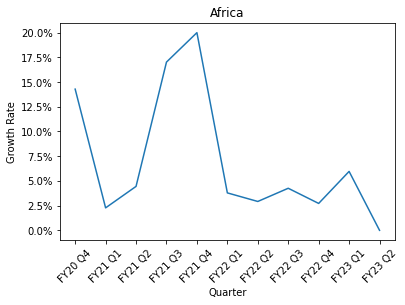

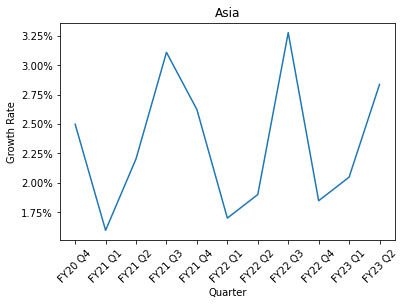

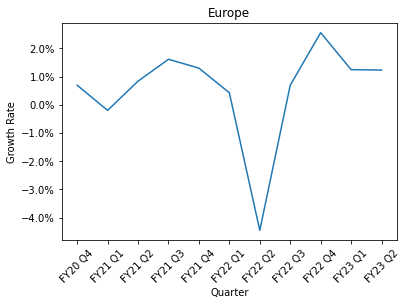

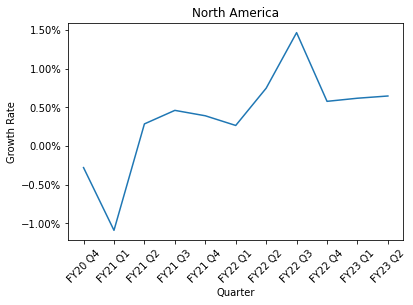

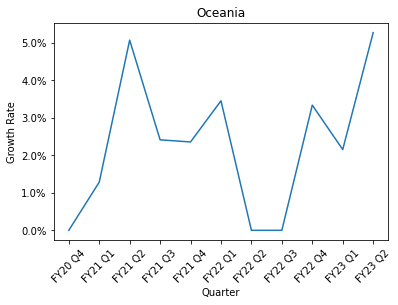

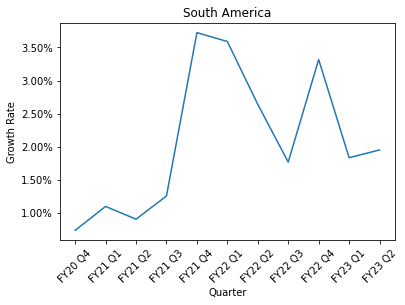

In [180]:
import matplotlib.ticker as mtick

arr_continent = new_data_store_regions['Continent'].unique()

for continent in arr_continent:
    #print(continent)
    df_continent = new_data_store_melt_growth[new_data_store_melt_growth['Continent'] == continent][['Continent', 'Quarter', 'Store Count']]
    growth_list = []
    for quarter in range(len(df_continent) - 1):
        a = df_continent.iloc[quarter]['Store Count']
        b = df_continent.iloc[quarter + 1]['Store Count']
        q = df_continent.iloc[quarter]['Quarter']
        growth_rate = (b - a) / a
        growth_list.append([q, growth_rate])
    #print(growth_list)
    df_growth = pd.DataFrame(growth_list)
    df_growth.columns = ['Quarter', 'Growth Rate']
    #print(df_growth.head())
    line_growth = sns.lineplot(data=df_growth, x='Quarter', y='Growth Rate')
    plt.title(continent)
    plt.xticks(rotation=45)
    line_growth.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
    plt.show()

now let's process the supplement data

In [188]:
new_supple = df_starbucks_supple[::-1]

[]

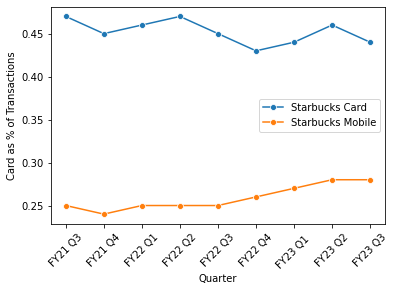

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x="Quarter", y="Card as % of Transactions", data=new_supple, marker='o', label='Starbucks Card')
sns.lineplot(x="Quarter", y="Mobile Order Transactions as % of Total Transactions", data=new_supple, marker='o', label='Starbucks Mobile')
plt.xticks(rotation = 45)
plt.plot()

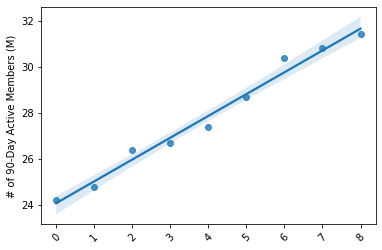

y = 24.08 + 0.947x


In [190]:
import scipy

p = sns.regplot(x=df_starbucks_supple.index, y="# of 90-Day Active Members (M)", data=new_supple, marker='o', label='Starbucks Dollars')
plt.xticks(rotation = 45)
plt.show()

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

print('y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')

<AxesSubplot:xlabel='Card as % of Transactions', ylabel='Mobile Order Transactions as % of Total Transactions'>

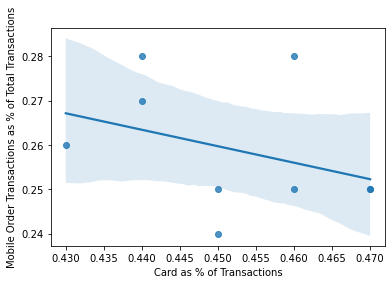

In [191]:
sns.regplot(x="Card as % of Transactions", y="Mobile Order Transactions as % of Total Transactions", data=new_supple, marker='o', label='Starbucks Card')

In [192]:
new_supple[['Card as % of Transactions', 'Mobile Order Transactions as % of Total Transactions']].corr(method='pearson')


,Card as % of Transactions,Mobile Order Transactions as % of Total Transactions
Card as % of Transactions,1.000000,-0.356466
Mobile Order Transactions as % of Total Transactions,-0.356466,1.000000


In [199]:
# new_supple.to_excel("new_data_sup.xlsx", sheet_name="Supplemental Data", index=False)

with pd.ExcelWriter("new_data_sup.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    new_data_store.to_excel(writer, sheet_name="Number of Stores by Country", index=False)
    new_supple.to_excel(writer, sheet_name="Supplemental Data", index=False)

## Summary
- North America and Asia leads number of open stores by a wide margin followed by Europe, South America, and Africa.
- While there is overall growth throughout all continents, we can see that growth in Africa and Asia seem to be seasonal while growth in Europe and the Americas seems to grow steadily over time.
- While customers used their Starbucks cards less for their transactions, they used Mobile orders more often over time.
- We can carefully predict that Starbucks gains 983000 90-Day Active Members for every quarter.
- There seems to be no correlation between customers using their Starbucks card for their transactions and customers using mobile orders for their transactions.